## Observations and Insights 

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df=pd.merge(mouse_metadata, study_results, how='left', on='Mouse ID')
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the DataFrame.
uniquenumber= combined_df['Mouse ID'].nunique()
uniquenumber

249

In [7]:
# Total entries
counts= len(combined_df['Mouse ID'])
counts

1893

In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

micecounts = combined_df.loc[:, ["Mouse ID","Timepoint"]]

#micecounts= micecounts.duplicated(['Mouse ID','Timepoint'])

micecounts= micecounts.duplicated(['Mouse ID','Timepoint'])

#micecounts

#Return the boolean series MICECOUNTS in the table with no quotation mark. quotation only searches for columns
combined_df[micecounts]

#show actual value of duplicates
miceunique= combined_df[micecounts]["Mouse ID"].unique()
miceunique

array(['g989'], dtype=object)

In [9]:
# Optional: Get all the data for the duplicate mouse ID. 
# multiple ways to show the data as below
# 1.
#isIDg989 = combined_df['Mouse ID'] == 'g989'
# combined_df[isIDg989]

# 2.
# combined_df.loc[combined_df['Mouse ID'] == 'g989', :]

# 3.
combined_df[combined_df['Mouse ID'] == 'g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_df = combined_df.loc[:, ["Mouse ID","Timepoint"]]
                             
clean_df = combined_df.drop_duplicates(['Mouse ID','Timepoint'])
                             

#micecounts=micecounts["Mouse ID"].value_counts()
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [11]:
# Checking the number of mice in the clean DataFrame.
micecounts_cleaned= clean_df['Mouse ID'].nunique()
micecounts_cleaned

249

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straightforward, creating multiple series and putting them all together at the end.

#Normal
drug_mean= clean_df.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']
drug_mean

drug_median= clean_df.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']
drug_median

drug_var= clean_df.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']
#drug_var

drug_std= clean_df.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']
#drug_std

drug_sem= clean_df.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']
#drug_sem

drugdata= pd.DataFrame({"mean": drug_mean, "median": drug_median,"var": drug_var, "std": drug_std, "sem": drug_sem})

drugdata

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function.
# DataFrame.agg(self, func, axis=0, *args, **kwargs)


sum_data= clean_df.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)':["mean","median","var","std","sem"]})
sum_data


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar Plots

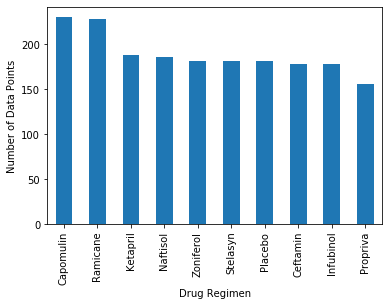

<Figure size 432x288 with 0 Axes>

In [14]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.

counts= clean_df['Drug Regimen'].value_counts()
bar_chart = counts.plot(kind='bar')
bar_chart.set_xlabel("Drug Regimen")
bar_chart.set_ylabel("Number of Data Points")


plt.show()
plt.tight_layout()


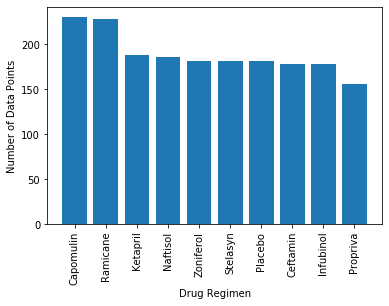

In [15]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
counts= clean_df['Drug Regimen'].value_counts()

plt.bar(counts.index.values,counts.values)
plt.xlabel("Drug Regimen")

plt.xticks(rotation=90)

plt.ylabel("Number of Data Points")
plt.show()

## Pie Plots

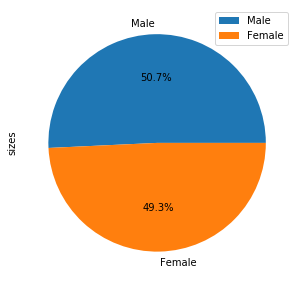

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
counts= clean_df['Sex'].value_counts()
counts

Male= 958
Female= 930

index = ["Male", "Female"]

# The values of each section of the pie chart
sizes = [958, 930]


df = pd.DataFrame({'sizes': [958, 930]},
                  index=['Male', 'Female'])

plot = df.plot.pie(y='sizes', figsize=(5, 5),autopct="%1.1f%%")


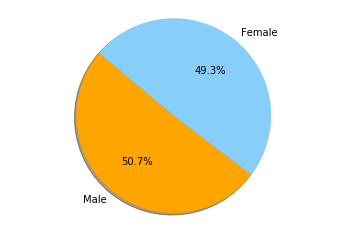

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#counts= clean_df['Mouse ID','Sex'].value_counts()
counts= clean_df['Sex'].value_counts()

Male= 958
Female= 930

labels = ["Male", "Female"]

# The values of each section of the pie chart
sizes = [958, 930]

# The colors of each section of the pie chart
colors = ["orange","lightskyblue"]

plt.pie(sizes, labels=labels, colors=colors, shadow=True, startangle=140,autopct="%1.1f%%")
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.

# Capomulin, Ramicane, Infubinol, and Ceftamin

cap= clean_df.loc[:, ["Mouse ID","Drug Regimen","Timepoint","Tumor Volume (mm3)"]]
#cap.head(50)

# find the final timepoint of each mouse
capgroup= cap.groupby(["Mouse ID"])["Timepoint"].max()

# create a table of ID at final Timepoint 
capgroup=pd.DataFrame(capgroup)

# merge the final timepoint of each mouse with filtered data for necessary columns to see final tumor volumn size
final=pd.merge(capgroup, cap, how='left', on=['Mouse ID','Timepoint'])


# final tumor volumn of CAPOMULIN drug for each mouse
capfil= final.loc[final['Drug Regimen'] == 'Capomulin']


# final tumor volumn of RAMICANE drug for each mouse
ramfil= final.loc[final['Drug Regimen'] == 'Ramicane']



# final tumor volumn of Ceftamin drug for each mouse
ceffil= final.loc[final['Drug Regimen'] == 'Ceftamin']


# final tumor volumn of Infubinol drug for each mouse
inffil= final.loc[final['Drug Regimen'] == 'Infubinol']



In [19]:
#IQR of Capomulin

quartiles = capfil['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of occupancy is: {lowerq}")
print(f"The upper quartile of occupancy is: {upperq}")
print(f"The interquartile range of occupancy is: {iqr}")
print(f"The the median of occupancy is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_occupancy = capfil.loc[(capfil['Tumor Volume (mm3)'] < lower_bound) | (capfil['Tumor Volume (mm3)'] > upper_bound)]
outlier_occupancy

The lower quartile of occupancy is: 32.37735684
The upper quartile of occupancy is: 40.1592203
The interquartile range of occupancy is: 7.781863460000004
The the median of occupancy is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


,Mouse ID,Timepoint,Drug Regimen,Tumor Volume (mm3)


In [20]:
#IQR of RAMICANE

quartiles = ramfil['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of occupancy is: {lowerq}")
print(f"The upper quartile of occupancy is: {upperq}")
print(f"The interquartile range of occupancy is: {iqr}")
print(f"The the median of occupancy is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_occupancy = ramfil.loc[(ramfil['Tumor Volume (mm3)'] < lower_bound) | (ramfil['Tumor Volume (mm3)'] > upper_bound)]
outlier_occupancy

The lower quartile of occupancy is: 31.56046955
The upper quartile of occupancy is: 40.65900627
The interquartile range of occupancy is: 9.098536719999998
The the median of occupancy is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


,Mouse ID,Timepoint,Drug Regimen,Tumor Volume (mm3)


In [21]:
#IQR of Ceftamin 

quartiles = ceffil['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of occupancy is: {lowerq}")
print(f"The upper quartile of occupancy is: {upperq}")
print(f"The interquartile range of occupancy is: {iqr}")
print(f"The the median of occupancy is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_occupancy = ceffil.loc[(ceffil['Tumor Volume (mm3)'] < lower_bound) | (ceffil['Tumor Volume (mm3)'] > upper_bound)]

outlier_occupancy

The lower quartile of occupancy is: 48.72207785
The upper quartile of occupancy is: 64.29983003
The interquartile range of occupancy is: 15.577752179999997
The the median of occupancy is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


,Mouse ID,Timepoint,Drug Regimen,Tumor Volume (mm3)


In [22]:
#IQR of Infubinol

quartiles = inffil['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of occupancy is: {lowerq}")
print(f"The upper quartile of occupancy is: {upperq}")
print(f"The interquartile range of occupancy is: {iqr}")
print(f"The the median of occupancy is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_occupancy = inffil.loc[(inffil['Tumor Volume (mm3)'] < lower_bound) | (inffil['Tumor Volume (mm3)'] > upper_bound)]
outlier_occupancy


# The outlier for Infubinol drug is Mouse ID c326

The lower quartile of occupancy is: 54.04860769
The upper quartile of occupancy is: 65.52574285
The interquartile range of occupancy is: 11.477135160000003
The the median of occupancy is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


,Mouse ID,Timepoint,Drug Regimen,Tumor Volume (mm3)
31,c326,5,Infubinol,36.321346


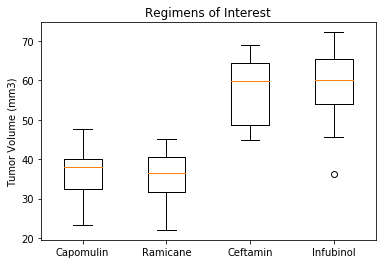

In [23]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# final tumor volumn of Capomulin drug for each mouse
capfil= final.loc[final['Drug Regimen'] == 'Capomulin']
list1= capfil['Tumor Volume (mm3)']

# final tumor volumn of Ramicane drug for each mouse
ramfil= final.loc[final['Drug Regimen'] == 'Ramicane']
list2= ramfil['Tumor Volume (mm3)']


# final tumor volumn of Ceftamin drug for each mouse
ceffil= final.loc[final['Drug Regimen'] == 'Ceftamin']
list3= ceffil['Tumor Volume (mm3)']

# final tumor volumn of Infubinol drug for each mouse
inffil= final.loc[final['Drug Regimen'] == 'Infubinol']
list4= inffil['Tumor Volume (mm3)']


fig1, ax1 = plt.subplots()

ax1.set_title('Regimens of Interest')
ax1.set_ylabel('Tumor Volume (mm3)')

ax1.boxplot([list1, list2, list3,list4])

names=('Capomulin','Ramicane','Ceftamin','Infubinol')
ax1.set_xticklabels(names) 
plt.show()

## Line and Scatter Plots

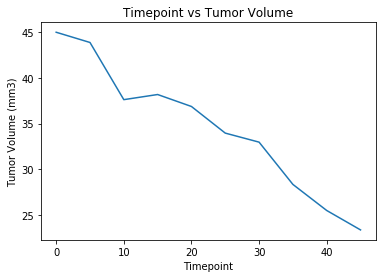

In [28]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#Listing out the data needed by .loc
cap= clean_df.loc[:, ["Mouse ID","Drug Regimen","Timepoint","Tumor Volume (mm3)"]]
cap.head()

#filter 2 conditions
capdata= cap[(cap['Drug Regimen'] == 'Capomulin')&(cap['Mouse ID']=='s185')]
#capdata

#x axis is the time point
x_axis = np.arange(0, 50, 5)

#y axis is volumn of tumor
points =[45.000000,43.878496,37.614948,38.177232,36.866876,33.949940,32.959671,28.328531,25.472143,23.343598]

# # Give our graph axis labels
plt.title("Timepoint vs Tumor Volume")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

plt.plot(x_axis, points)
plt.show()


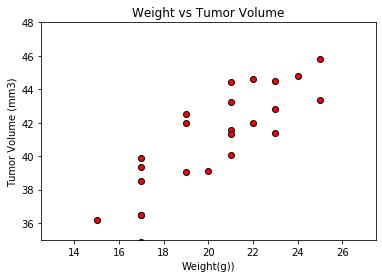

In [25]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
cap= clean_df.loc[:, ["Mouse ID","Drug Regimen","Weight (g)","Tumor Volume (mm3)"]]
#cap.head()

#filter each mouse mean volumn match MOUSE ID 
volume= cap.groupby(["Drug Regimen","Mouse ID","Weight (g)"]).mean()["Tumor Volume (mm3)"]
#volume.head(25)

# create a merged filter-data of Capomulin 
datasize= pd.merge(volume, cap, how='left', on=['Mouse ID','Drug Regimen','Weight (g)','Tumor Volume (mm3)'])
capfil= datasize.loc[datasize['Drug Regimen'] == 'Capomulin']

#capfil

# set the weight column data to use for graph
weights=capfil['Weight (g)']

# reset the groupby filtered dataset 
volume= volume.reset_index()

# set the volumes column data to use for graph
volumes =capfil['Tumor Volume (mm3)']

x= weights
y= volumes

plt.scatter(weights, volumes, marker="o", facecolors="red", edgecolors="black")

plt.title("Weight vs Tumor Volume")
plt.xlabel("Weight(g))")
plt.ylabel("Tumor Volume (mm3)")

# # The y limits of our scatter plot is 0 to 1
plt.ylim(35, 48)


# # The x limits of our scatter plot is 0 to 100
plt.xlim(12.5,27.5)

plt.show()

## Correlation and Regression

In [26]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

print(f"The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is {round(st.pearsonr(weights,volumes)[0],2)}")


The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is 0.84


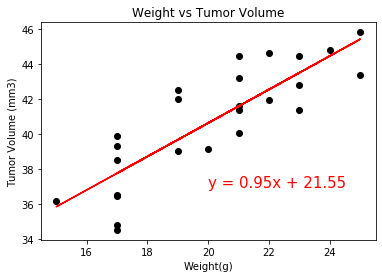

In [27]:
#### GENERATED FROM LAST QUESTION FOR WEIGHTS AND VOLUME FITER BY CAPOMULIN
cap= clean_df.loc[:, ["Mouse ID","Drug Regimen","Weight (g)","Tumor Volume (mm3)"]]

## filter each mouse mean volumn match MOUSE ID 
volume= cap.groupby(["Mouse ID","Drug Regimen","Weight (g)"]).mean()["Tumor Volume (mm3)"]

datasize= pd.merge(volume, cap, how='left', on=['Mouse ID','Drug Regimen','Weight (g)','Tumor Volume (mm3)'])

capfil= datasize.loc[datasize['Drug Regimen'] == 'Capomulin']

weights=capfil['Weight (g)']
volume =capfil['Tumor Volume (mm3)']

#### ALL ABOVE WAS GENERATED FROM LAST QUESTION 

# set axis
xlabel=weights
ylabel=volumes


(slope, intercept, rvalue, pvalue, stderr) = linregress(xlabel, ylabel)
regress_values = xlabel * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(weights, volumes, color='black')

plt.plot(weights,regress_values,"r-")

plt.annotate(line_eq,(20,37),fontsize=15,color="red")

plt.title("Weight vs Tumor Volume")
plt.xlabel("Weight(g)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()
